# Exploratory data analysis for student grades

In [1]:
import pandas as pd
import numpy as np

**Loading a DataFrame from a file**

In [2]:
stud_data = pd.read_csv('grades.csv',delimiter=',',header='infer')
stud_data.Name.count()

24

**Handling missing values**

In [3]:
# Checking how many rows are null

stud_data.isnull().sum()

Name          0
StudyHours    1
Grade         2
dtype: int64

In [4]:
# getting information from dataframe
stud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        24 non-null     object 
 1   StudyHours  23 non-null     float64
 2   Grade       22 non-null     float64
dtypes: float64(2), object(1)
memory usage: 704.0+ bytes


In [5]:
# both the datatypes are float. we can find mean and replace it in null values.

float_columns = stud_data.select_dtypes(include=['float64']).columns
stud_data_filled = stud_data.copy() # getting the copy of original as inplace not working
mean_values = stud_data[float_columns].mean() # getting the mean values 
stud_data_filled[float_columns] = stud_data[float_columns].fillna(mean_values)
stud_data_filled.isnull().sum()

Name          0
StudyHours    0
Grade         0
dtype: int64

Here we have replaced all the null values with the mean of the rows for particular columns

**Explore data in the DataFrame**

In [7]:
# check the mean of the grades and study hours of students

study_hrs_mean = stud_data_filled['StudyHours'].mean()
grade_mean = stud_data_filled['Grade'].mean()

print("Average weekly study hours: {:.2f}\nAverage grades of student: {:.2f}".format(study_hrs_mean, grade_mean))

Average weekly study hours: 10.41
Average grades of student: 49.18


In [12]:
# Get students who studied more than mean in descending order.
stud_data_1 = stud_data_filled[stud_data_filled.StudyHours > study_hrs_mean].sort_values(by = 'StudyHours', ascending=False)
stud_data_1

,Name,StudyHours,Grade
3,Rosie,16.00,97.0
10,Francesca,15.50,82.0
14,Jenny,15.50,70.0
9,Giovanni,14.50,74.0
11,Rajab,13.75,62.0
20,Daniel,12.50,63.0
19,Skye,12.00,52.0
21,Aisha,12.00,64.0
1,Joann,11.50,50.0
6,Frederic,11.50,53.0


In [13]:
# Check the mean of the students whose study hours is greater than mean in descending order

stud_data_tmp = stud_data_1[stud_data_1.Grade > grade_mean]
print("Average mean grade for students who study hours is more than mean is ", stud_data_tmp['Grade'].mean())

Average mean grade for students who study hours is more than mean is  66.7


Let's assume that the passing grade for the course is 60.

In [18]:
# Assuming the passing mark is 60. We have categorised students if they are pass or not

stud_data_filled['Pass'] = np.where(stud_data_filled['Grade'] >= 60, True, False)
stud_data_filled

,Name,StudyHours,Grade,Pass
0,Dan,10.000000,50.000000,False
1,Joann,11.500000,50.000000,False
2,Pedro,9.000000,47.000000,False
3,Rosie,16.000000,97.000000,True
4,Ethan,9.250000,49.000000,False
5,Vicky,1.000000,3.000000,False
6,Frederic,11.500000,53.000000,False
7,Jimmie,9.000000,42.000000,False
8,Rhonda,8.500000,26.000000,False
9,Giovanni,14.500000,74.000000,True


In [19]:
# Check how many students pass 

stud_data_filled.groupby('Pass').Name.count()

# 4 students are passed

Pass
False    17
True      7
Name: Name, dtype: int64

In [20]:
# To find mean of studyhours and Grades for students who pass 

display(stud_data_filled.groupby('Pass')[['StudyHours', 'Grade']].mean())

,StudyHours,Grade
Pass,,
False,8.83312,39.315508
True,14.25000,73.142857


In [21]:
# Create a DataFrame with the data sorted by Grade (descending)
stud_data_filled = stud_data_filled.sort_values('Grade', ascending=False)

# Show the DataFrame
stud_data_filled

,Name,StudyHours,Grade,Pass
3,Rosie,16.000000,97.000000,True
10,Francesca,15.500000,82.000000,True
9,Giovanni,14.500000,74.000000,True
14,Jenny,15.500000,70.000000,True
21,Aisha,12.000000,64.000000,True
20,Daniel,12.500000,63.000000,True
11,Rajab,13.750000,62.000000,True
6,Frederic,11.500000,53.000000,False
19,Skye,12.000000,52.000000,False
0,Dan,10.000000,50.000000,False


# Visualizing data with Matplotlib and seaborn

In [27]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns

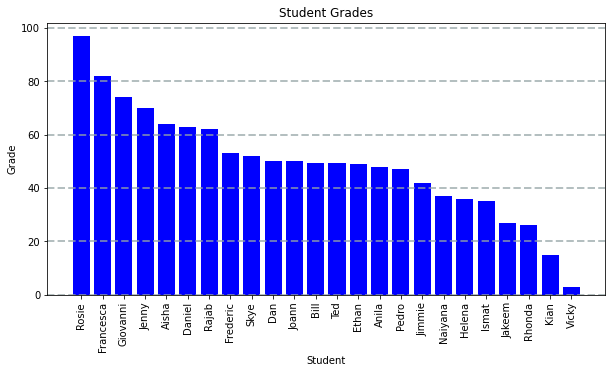

In [28]:
# Create a bar plot of name vs grade using matplotlib
# Create a Figure
fig = plt.figure(figsize=(10,5))

plt.bar(x=stud_data_filled.Name, height=stud_data_filled.Grade, color='blue')

# Customize the chart
plt.title('Student Grades')
plt.xlabel('Student')
plt.ylabel('Grade')
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)

# Display the plot
plt.show()

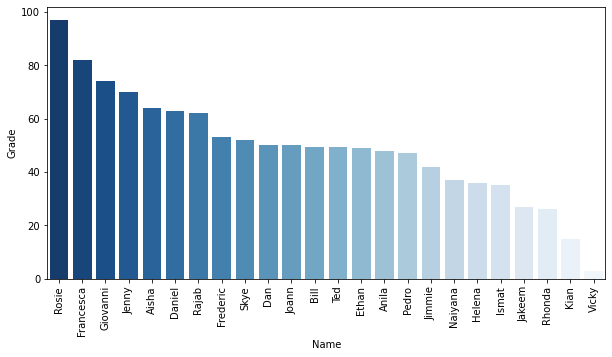

In [31]:
# Create a bar plot of name vs grade using seaborn
fig = plt.figure(figsize=(10,5))
sns.barplot(x = 'Name', y = 'Grade', data = stud_data_filled, palette= 'Blues_r')
plt.xticks(rotation=90)
plt.show()

C:\Users\rahul\AppData\Local\Temp\ipykernel_13056\1668393549.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(stud_data_filled.Name, rotation=90)


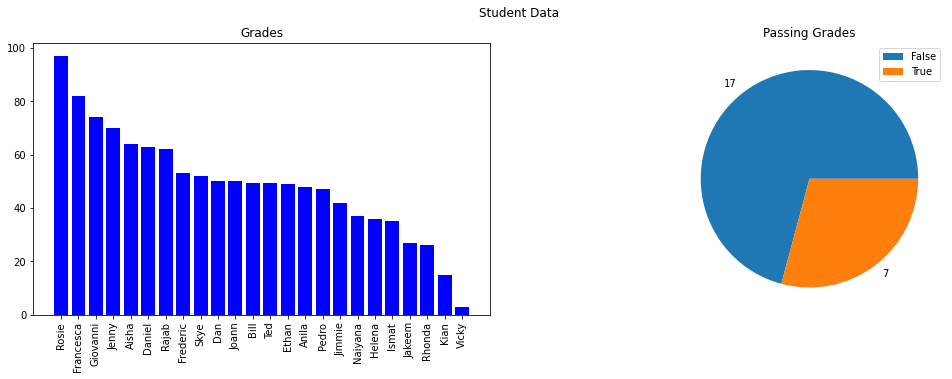

In [38]:
# Creating a subplots

# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (18,5))

# Create a bar plot of name vs grade on the first axis
ax[0].bar(x=stud_data_filled.Name, height=stud_data_filled.Grade, color='blue')
ax[0].set_title('Grades')
ax[0].set_xticklabels(stud_data_filled.Name, rotation=90)

# Create a pie chart of pass counts on the second axis
pass_counts = stud_data_filled['Pass'].value_counts()
ax[1].pie(pass_counts, labels=pass_counts)
ax[1].set_title('Passing Grades')
ax[1].legend(pass_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Student Data')

# Show the figure
plt.show()

# Statistical analysis

**Descriptive statistics and data distribution** - Descriptive statistics are brief informational coefficients that summarize a given data set, which can be either a representation of the entire population or a sample of a population.

1. Measures of central tendency - Mean, Median, Mode
2. Measures of variability - Range, Standard Deviation, Variance


Minimum:3.00
Mean:49.18
Median:49.18
Mode:49.18
Maximum:97.00



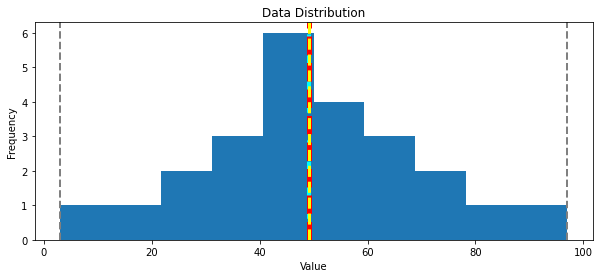

In [42]:
# Get the variable to examine
var = stud_data_filled['Grade']

# Get statistics
min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()
mod_val = var.mode()[0]

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        mod_val,
                                                                                        max_val))

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.hist(var)

# Add lines for the statistics
plt.axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 4)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 5)
plt.axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 3)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

# Add titles and labels
plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the figure
plt.show()

The box plot shows the distribution of the grade values in a different format to the histogram. The box part of the plot shows where the inner two quartiles of the data reside.
The line in the box indicates the median value.

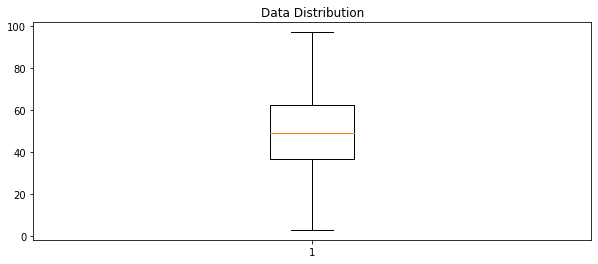

In [43]:
# Box whisker plot

# Get the variable to examine
var = stud_data_filled['Grade']

# Create a Figure
fig = plt.figure(figsize=(10,4))

# Plot a histogram
plt.boxplot(var)

# Add titles and labels
plt.title('Data Distribution')

# Show the figure
plt.show()

Minimum:3.00
Mean:49.18
Median:49.18
Mode:49.18
Maximum:97.00



C:\Users\rahul\AppData\Local\Temp\ipykernel_13056\3883636911.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


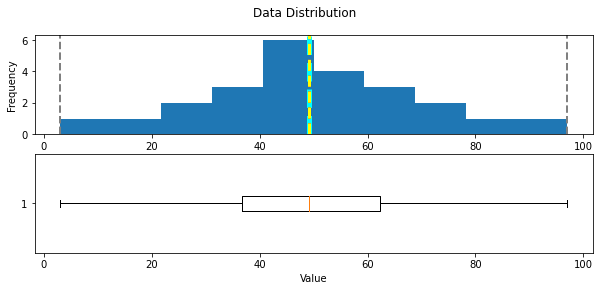

In [45]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 5)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 3)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 3)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = stud_data_filled['Grade']
# Call the function
show_distribution(col)

All of the measurements of central tendency are right in the middle of the data distribution, which is symmetric with values becoming progressively lower in both directions from the middle.

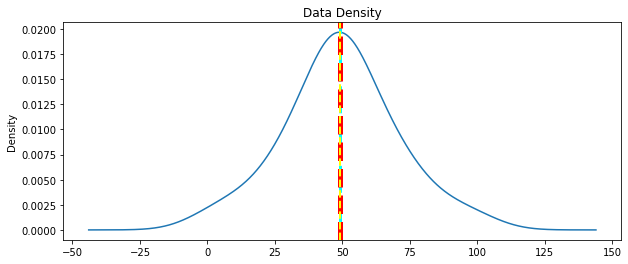

In [47]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 3)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 5)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
col = stud_data_filled['Grade']
show_density(col)

As expected from the histogram of the sample, the density shows the characteristic 'bell curve" of what statisticians call a normal distribution with the mean and mode at the center and symmetric tails.

Now let's take a look at the distribution of the study hours data.

Minimum:1.00
Mean:10.41
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\rahul\AppData\Local\Temp\ipykernel_13056\3883636911.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


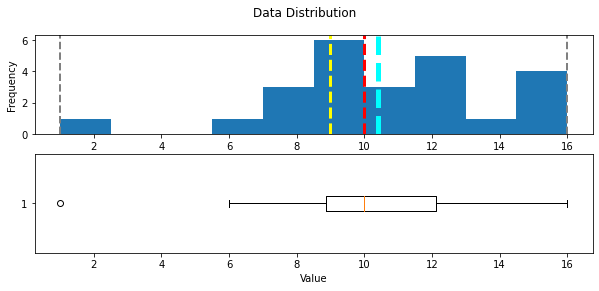

In [48]:
# Get the variable to examine
col = stud_data_filled['StudyHours']
# Call the function
show_distribution(col)

The distribution of the study time data is significantly different from that of the grades.

Note that the whiskers of the box plot only extend to around 6.0, indicating that the vast majority of the first quarter of the data is above this value. The minimum is marked with an o, indicating that it is statistically an outlier - a value that lies significantly outside the range of the rest of the distribution.

Outliers can occur for many reasons. Maybe a student meant to record "10" hours of study time, but entered "1" and missed the "0". Or maybe the student was abnormally lazy when it comes to studying! Either way, it's a statistical anomaly that doesn't represent a typical student. 

Minimum:6.00
Mean:10.82
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\rahul\AppData\Local\Temp\ipykernel_13056\3883636911.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


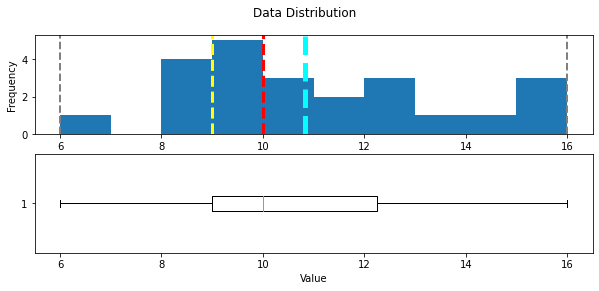

In [51]:
# Get the variable to examine
col = stud_data_filled[stud_data_filled.StudyHours>1]['StudyHours']
# Call the function
show_distribution(col)

Minimum:6.00
Mean:10.82
Median:10.00
Mode:9.00
Maximum:16.00



C:\Users\rahul\AppData\Local\Temp\ipykernel_13056\3883636911.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


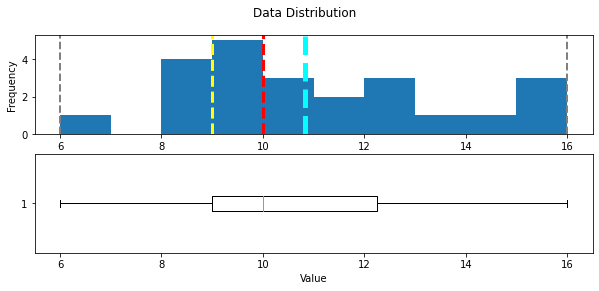

In [54]:
# Get the variable to examine
col = stud_data_filled[stud_data_filled.StudyHours>1]['StudyHours']
# Call the function
show_distribution(col)

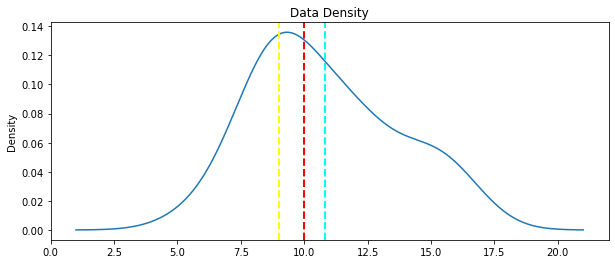

In [55]:
# Get the variable to examine
col = stud_data_filled[stud_data_filled.StudyHours>1]['StudyHours']
# Get the density of StudyHours
show_density(col)

This kind of distribution is called right skewed. The mass of the data is on the left side of the distribution, creating a long tail to the right because of the values at the extreme high end; which pull the mean to the right.

These types of graphs called biased graph.

Right tailed -> left skewed

Left tailed -> Right skewed

# Measures of variance

**Range**: The difference between the maximum and minimum. There's no built-in function for this, but it's easy to calculate using the min and max functions.

**Variance**: The average of the squared difference from the mean. You can use the built-in var function to find this.

**Standard Deviation**: The square root of the variance. You can use the built-in std function to find this.

In [56]:
for col_name in ['Grade','StudyHours']:
    col = stud_data_filled[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


Grade:
 - Range: 94.00
 - Variance: 431.45
 - Std.Dev: 20.77

StudyHours:
 - Range: 15.00
 - Variance: 11.37
 - Std.Dev: 3.37


**Standard deviation** provides a measure of variance in the data on the same scale as the data itself. The higher the standard deviation, the more variance there is when comparing values in the distribution to the distribution mean - in other words, the data is more spread out.

When working with a normal distribution, the standard deviation works with the particular characteristics of a normal distribution to provide even greater insight.

standard deviation - 20.77
mean - 49.18


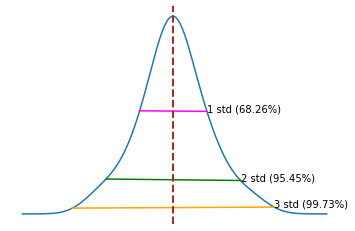

In [77]:
import scipy.stats as stats

# Get the Grade column
col = stud_data_filled['Grade']

# get the density

# Gaussian distribution (a bell-shaped curve) at each data 
# point and then sum up these distributions to create an overall smooth curve that represents the underlying data distribution.
density = stats.gaussian_kde(col)

# Plot the density
col.plot.density()

# Get the mean and standard deviation
s = col.std()
m = col.mean()

print("standard deviation - {:.2f}".format(s))
print("mean - {:.2f}".format(m))

# Annotate 1 stdev
x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1,y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1],y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2,y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3,y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1],y3[1]))

# Show the location of the mean
plt.axvline(col.mean(), color='brown', linestyle='dashed', linewidth=2)

plt.axis('off')

plt.show()


**Kernel Density Estimation (KDE)** is a technique commonly used in EDA to estimate the probability density function of a random variable. It helps you visualize the distribution of your data in a smoothed manner, which can be particularly useful when dealing with continuous data.

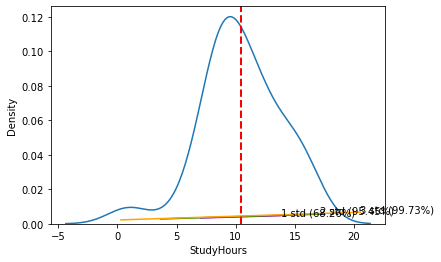

In [79]:
# Plotting Kernal density function using seaborn

col = stud_data_filled['StudyHours']
sns.kdeplot(col)

# col.plot.density()

# Get the mean and standard deviation
s = col.std()
m = col.mean()

# Annotate 1 standard deviation
x1 = [m-s, m+s]
y1 = density(x1)
plt.plot(x1,y1, color='magenta')
plt.annotate('1 std (68.26%)', (x1[1],y1[1]))

# Annotate 2 stdevs
x2 = [m-(s*2), m+(s*2)]
y2 = density(x2)
plt.plot(x2,y2, color='green')
plt.annotate('2 std (95.45%)', (x2[1],y2[1]))

# Annotate 3 stdevs
x3 = [m-(s*3), m+(s*3)]
y3 = density(x3)
plt.plot(x3,y3, color='orange')
plt.annotate('3 std (99.73%)', (x3[1],y3[1]))

plt.axvline(col.mean(), color='red', linestyle='dashed', linewidth=2)

plt.show()

The horizontal lines show the percentage of data within 1, 2, and 3 standard deviations of the mean (plus or minus).

In [80]:
# Data exploration through descriptive analysis

stud_data_filled.describe()

,StudyHours,Grade
count,24.000000,24.000000
mean,10.413043,49.181818
std,3.371563,20.771294
min,1.000000,3.000000
25%,8.875000,36.750000
50%,10.000000,49.181818
75%,12.125000,62.250000
max,16.000000,97.000000


**Comparing the data**

In [83]:
# Removing the outliers for the study hours which we saw previously
df_sample = stud_data_filled[stud_data_filled['StudyHours']>1]
df_sample.head()

,Name,StudyHours,Grade,Pass
3,Rosie,16.0,97.0,True
10,Francesca,15.5,82.0,True
9,Giovanni,14.5,74.0,True
14,Jenny,15.5,70.0,True
21,Aisha,12.0,64.0,True


**Comparing numeric and categorical variables**

The data includes two **numeric variables (StudyHours and Grade)** and two **categorical variables (Name and Pass)**. Let's start by comparing the numeric StudyHours column to the categorical Pass column to see if there's an apparent relationship between the number of hours studied and a passing grade

<AxesSubplot:title={'center':'StudyHours'}, xlabel='Pass'>

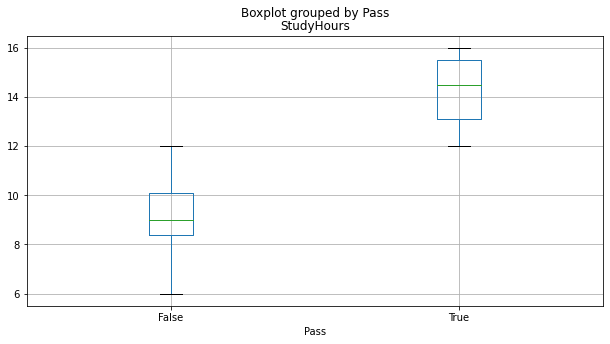

In [85]:
df_sample.boxplot(column='StudyHours', by='Pass', figsize=(10,5))

Students who passed the course tended to study for more hours than students who didn't. So if you wanted to predict whether or not a student is likely to pass the course, the amount of time they spend studying may be a good predictive feature.

**Comparing numeric variables**

<AxesSubplot:xlabel='Name'>

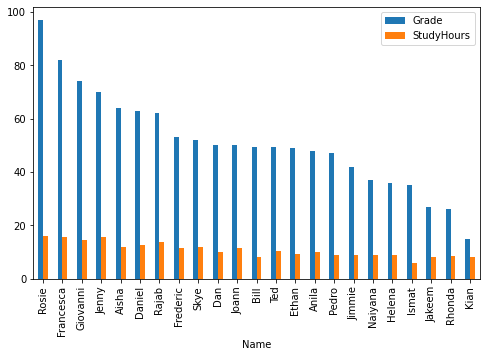

In [86]:
# Create a bar plot of name vs grade and study hours
df_sample.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(8,5))

The chart shows bars for both grade and study hours for each student; but it's not easy to compare because the values are on different scales. Grades are measured in grade points, and range from 3 to 97; while study time is measured in hours and ranges from 1 to 16.

A common technique when dealing with numeric data in different scales is to normalize the data so that the values retain their proportional distribution, but are measured on the same scale. To accomplish this, we'll use a technique called MinMax scaling that distributes the values proportionally on a scale of 0 to 1.

<AxesSubplot:xlabel='Name'>

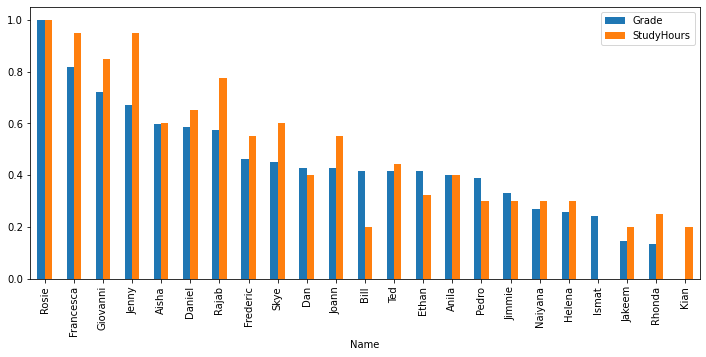

In [88]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()

# Create a new dataframe for the scaled values
df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

# Normalize the numeric columns
df_normalized[['Grade','StudyHours']] = scaler.fit_transform(df_normalized[['Grade','StudyHours']])

# Plot the normalized values
df_normalized.plot(x='Name', y=['Grade','StudyHours'], kind='bar', figsize=(12,5))

Correlation between study time and grade; and in fact, there's a statistical correlation measurement we can use to quantify the relationship between these columns.

In [89]:
df_normalized.Grade.corr(df_normalized.StudyHours)

0.8939016170035705

The correlation statistic is a value between -1 and 1 that indicates the strength of a relationship. Values above 0 indicate a positive correlation (high values of one variable tend to coincide with high values of the other), while values below 0 indicate a negative correlation (high values of one variable tend to coincide with low values of the other). In this case, the correlation value is close to 1; showing a strongly positive correlation between study time and grade.

Another way to visualise the apparent correlation between two numeric columns is to use a scatter plot

<AxesSubplot:title={'center':'Study Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

<Figure size 720x288 with 0 Axes>

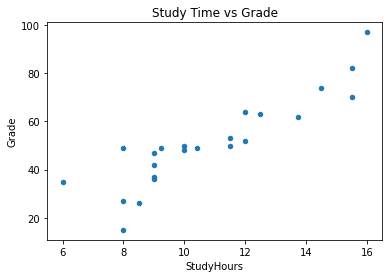

In [92]:
# Create a scatter plot
fig = plt.figure(figsize=(10,4))
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

Again, it looks like there's a discernible pattern in which the students who studied the most hours are also the students who got the highest grades.

least squares regression.

slope: 6.0331
y-intercept: -14.1019

 f(x) = 6.0331x + -14.1019


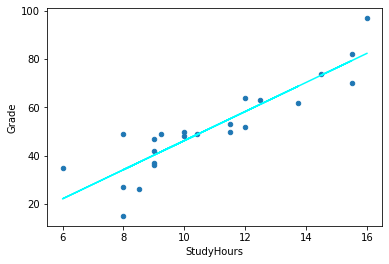

In [94]:
from scipy import stats

#
df_regression = df_sample[['Grade', 'StudyHours']].copy()

# Get the regression slope and intercept
m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])
print('slope: {:.4f}\ny-intercept: {:.4f}'.format(m,b))
print('\n f(x) = {:.4f}x + {:.4f}'.format(m,b))

# Use the function (mx + b) to calculate f(x) for each x (StudyHours) value
df_regression['fx'] = (m * df_regression['StudyHours']) + b

# Calculate the error between f(x) and the actual y (Grade) value
df_regression['error'] = df_regression['fx'] - df_regression['Grade']


# Create a scatter plot of Grade vs StudyHours
df_regression.plot.scatter(x='StudyHours', y='Grade')

# Plot the regression line
plt.plot(df_regression['StudyHours'],df_regression['fx'], color='cyan')

# Display the plot
plt.show()

In [96]:
# Show the original x,y values, the f(x) value, and the error
df_regression[['StudyHours', 'Grade', 'fx', 'error']].head()

,StudyHours,Grade,fx,error
3,16.0,97.0,82.427075,-14.572925
10,15.5,82.0,79.410543,-2.589457
9,14.5,74.0,73.377481,-0.622519
14,15.5,70.0,79.410543,9.410543
21,12.0,64.0,58.294824,-5.705176


**Using the regression coefficients for prediction**

In [100]:
def f(x):
    m = 6.0331
    b = -14.1019
    return m*x + b

study_time = 15

# Get f(x) for study time
prediction = f(study_time)

# Grade can't be less than 0 or more than 100
expected_grade = max(0,min(100,prediction))

#Print the estimated grade
print ('Studying for {} hours per week may result in a grade of {:.0f}'.format(study_time, expected_grade))

Studying for 15 hours per week may result in a grade of 76
